In [29]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as sk

In [39]:
column_names = ["Class Identifier","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv("wine.data", names = column_names)

y = df["Class Identifier"]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class Identifier, Length: 178, dtype: int64


In [40]:
df.drop("Class Identifier", axis=1, inplace=True)
features = df
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyan

Alcohol                            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Malic acid                      AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
Ash                             AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
Alcalinity of ash               AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
Magnesium                          AxesSubplot(0.125,0.703298;0.168478x0.0803191)
Total phenols                   AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
Flavanoids                      AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
Nonflavanoid phenols            AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
Proanthocyanins                    AxesSubplot(0.125,0.606915;0.168478x0.0803191)
Color intensity                 AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
Hue                             AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
OD280/OD315 of diluted wines    AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
Proline         

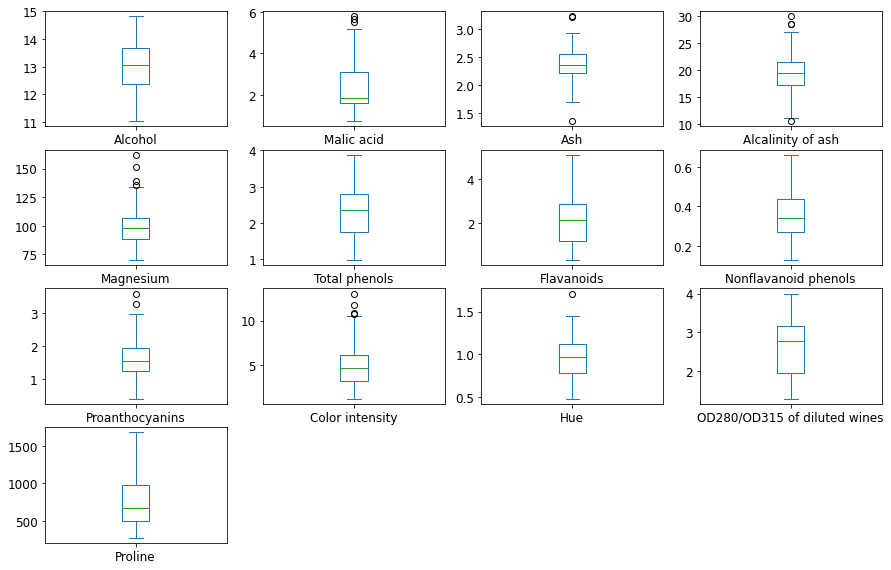

In [41]:
# USE BOX PLOT TO CHECK THE VALUE RANGE AND OUTLIERS OF EACH FEATURE
data_mean = df.iloc[:, :] # row, col
print(data_mean)
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [42]:
from sklearn.preprocessing import MinMaxScaler
names = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_mean)
normalized_df = pd.DataFrame(normalized_data, columns=names)
print(normalized_data)

# #Assign features to X
# X = features
# #Normalise the features to use zero mean normalisation

# from sklearn.preprocessing import StandardScaler
# names = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
# scaler = StandardScaler()
# Xs = scaler.fit_transform(X)
# normalized_df = pd.DataFrame(Xs, columns=names)
# fig,ax=plt.subplots(1,figsize=(20,8))
# sns.boxplot(data=Xs,ax=ax) 





[[0.842 0.192 0.572 ... 0.455 0.971 0.561]
 [0.571 0.206 0.417 ... 0.463 0.78  0.551]
 [0.561 0.32  0.701 ... 0.447 0.696 0.647]
 ...
 [0.589 0.7   0.481 ... 0.089 0.106 0.397]
 [0.563 0.366 0.54  ... 0.098 0.128 0.401]
 [0.816 0.664 0.738 ... 0.106 0.121 0.201]]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y,random_state=0,test_size=0.2) 

In [44]:
X_train


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
161,0.700000,0.498024,0.631016,0.484536,0.402174,0.293103,0.046414,0.698113,0.123028,0.392491,0.390244,0.201465,0.286733
92,0.436842,0.156126,0.481283,0.520619,0.108696,0.137931,0.236287,0.849057,0.381703,0.151024,0.390244,0.289377,0.154779
94,0.155263,0.247036,0.491979,0.381443,0.304348,0.703448,0.405063,0.075472,0.296530,0.168089,0.552846,0.619048,0.047789
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
24,0.650000,0.211462,0.668449,0.484536,0.282609,0.534483,0.478903,0.283019,0.394322,0.191126,0.520325,0.934066,0.404422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.207895,0.193676,0.278075,0.458763,0.173913,0.524138,0.274262,0.452830,0.318612,0.066553,0.373984,0.428571,0.097718
67,0.352632,0.084980,0.299465,0.463918,0.086957,0.389655,0.350211,0.264151,0.198738,0.290102,0.520325,0.809524,0.165478
117,0.365789,0.171937,0.443850,0.613402,0.413043,0.351724,0.369198,0.396226,0.378549,0.066553,0.471545,0.619048,0.047789
47,0.755263,0.185771,0.406417,0.278351,0.336957,0.731034,0.643460,0.150943,0.545741,0.411263,0.349593,0.754579,0.504280


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(score_func=chi2, k=4)

selector.fit(normalized_df, y)
np_normalized_data = pd.DataFrame(normalized_data, columns = names)
vector_names = list(np_normalized_data.columns[selector.get_support(indices=True)])
print(vector_names)




['Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']


In [46]:
# from sklearn.preprocessing import StandardScaler

# Xs = np_normalized_data[vector_names]
# print(np_normalized_data)
# fig,ax=plt.subplots(1,figsize=(20,8))
# sns.boxplot(data=Xs,ax=ax) 

In [60]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# print(Y)
# Y.describe()
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(normalized_df, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

sel_features = fit.transform(normalized_df)


# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature extraction
model = LogisticRegression(random_state = 0)
rfe = RFE(model, n_features_to_select=4, step = 1)
fit = rfe.fit(normalized_df, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

[ 9.454  8.119  0.935  3.32   1.641  9.402 16.051  5.346  3.981 12.453
  8.449 16.678 18.792]
Num Features: 4
Selected Features: [ True False False False False False  True False False False False  True
  True]
Feature Ranking: [ 1  7  5  4 10  6  1  9  8  2  3  1  1]


In [48]:
# vector_names = ['Alcohol', 'Flavanoids', 'OD280/OD315 of diluted wines', 'Proline']

trainX_best = X_train[vector_names]
testX_best = X_test[vector_names]

print(trainX_best.shape)
print(testX_best.shape)



(142, 4)
(36, 4)


#  DECISION TREE

In [49]:
#Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(trainX_best, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred = DT_classifier.predict(testX_best)


In [51]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


0.9722222222222222

#  LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression 
# instantiate the model 
logreg =  LogisticRegression(solver='liblinear') 
# fit the model with data 
logreg.fit(trainX_best,y_train) 
trainX_best

,Flavanoids,Color intensity,OD280/OD315 of diluted wines,Proline
161,0.046414,0.392491,0.201465,0.286733
92,0.236287,0.151024,0.289377,0.154779
94,0.405063,0.168089,0.619048,0.047789
174,0.086498,0.513652,0.106227,0.336662
24,0.478903,0.191126,0.934066,0.404422
...,...,...,...,...
103,0.274262,0.066553,0.428571,0.097718
67,0.350211,0.290102,0.809524,0.165478
117,0.369198,0.066553,0.619048,0.047789
47,0.643460,0.411263,0.754579,0.504280


In [53]:
# predicting 
y_pred = logreg.predict(testX_best) 
y_pred 

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[13  1  0]
 [ 2 12  2]
 [ 0  0  6]]


0.8611111111111112

# SVM

In [55]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
SVM_classifier.fit(trainX_best, y_train)

SVC(random_state=0)

In [56]:
y_pred = SVM_classifier.predict(testX_best)
print(y_pred)

[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 2 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


0.9166666666666666

# MULTI PLATYER PRECEPTRON NEURAL NETWORK

In [58]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
MLP_clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
MLP_clf.fit(trainX_best,y_train)

Iteration 1, loss = 1.23894089
Iteration 2, loss = 1.20796418
Iteration 3, loss = 1.17847982
Iteration 4, loss = 1.15044210
Iteration 5, loss = 1.12396292
Iteration 6, loss = 1.09911866
Iteration 7, loss = 1.07602660
Iteration 8, loss = 1.05483706
Iteration 9, loss = 1.03571099
Iteration 10, loss = 1.01884857
Iteration 11, loss = 1.00427584
Iteration 12, loss = 0.99190815
Iteration 13, loss = 0.98098501
Iteration 14, loss = 0.97123250
Iteration 15, loss = 0.96144448
Iteration 16, loss = 0.95094049
Iteration 17, loss = 0.93934171
Iteration 18, loss = 0.92631495
Iteration 19, loss = 0.91114934
Iteration 20, loss = 0.89438018
Iteration 21, loss = 0.87722314
Iteration 22, loss = 0.86032693
Iteration 23, loss = 0.84415618
Iteration 24, loss = 0.82935680
Iteration 25, loss = 0.81563953
Iteration 26, loss = 0.80310010
Iteration 27, loss = 0.79102910
Iteration 28, loss = 0.77868621
Iteration 29, loss = 0.76575869
Iteration 30, loss = 0.75234113
Iteration 31, loss = 0.73861509
Iteration 32, los

C:\Users\hamzo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [59]:
# Make prediction on test dataset
ypred= MLP_clf.predict(testX_best)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.9444444444444444